### Paxillin movie segmentation and object feature analysis

with Patrick's 2D fixed image pFAK and Zyxin

Liya Ding, 2024.11

In [1]:
import os
import tifffile 
import numpy as np

In [2]:
import sys
# The directory of the script
script_dir = os.getcwd() 
# Add the project root to sys.path
sys.path.append(script_dir)  # Adds current directory

from core.FA_object_segmentation import FA_obj_segmenter
from core.FA_obj_feature_extractor import FA_obj_feature_extractor
from utils.display_utils import display_fa_segmentation_panels

In [3]:
image_2D_2CH_dir =  '/mnt/d/lding/zyxin/data/240423_fixed_EGFP_zyxin_pFAK/Control_images'

output_dir = '/mnt/d/lding/FA/analysis_results/pFAK_zyxin_20230423/Control_pfak'
method_ID = 'code_org_20250303'

csv_output_dir = os.path.join(output_dir, method_ID+'_csv')
plot_output_dir = os.path.join(output_dir, method_ID+'_plot')
seg_output_dir = os.path.join(output_dir, method_ID+'_seg')

pixel_size = 0.0706
time_point = 0

os.makedirs(csv_output_dir, exist_ok=True)
os.makedirs(plot_output_dir, exist_ok=True)
os.makedirs(seg_output_dir, exist_ok=True)

sub_dirs = ['mask', 'seg', 'label', 'togglelabel', 'rgb']
for sub_dir in sub_dirs:
    os.makedirs(os.path.join(seg_output_dir, sub_dir), exist_ok=True)


### for each 3D stack run through MIP and 8th frame

In [4]:
# flag for some optinal parts
flag_plot = True
flag_plot_save = False
flag_seg_save = True
flag_csv_save = True
flag_panel_plot = True
flag_run_all  = False

In [5]:
# select the cells that are single/disconnected and complete
ctrl_one_cell_list = [0,4,5,14,15,17,20,21,22,23,24,25,28,29,33,37,39,40,41,46,47,48,49,51,52,56,59,60,61,64,
                      65,69,70,75,76,79,80,82,93,94,96,102,103,104,106,107,110,112,114,115,117,122,123,126,131,134,135,136,137,139,140,141,
                 149,162,166,173,177,183,185,187,189,194,195,196,197,198,201,202,214,215,217,220,224,228,231,236,237,246,248,250,252,253,251,257,258,259,262,263,
                 267,269,270,271,277,278,285,286,287,289,293,296]


/mnt/d/lding/UbuntuGitCodes/focal_adhesion_clustering/utils/img_utils.py:107: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return a[index]


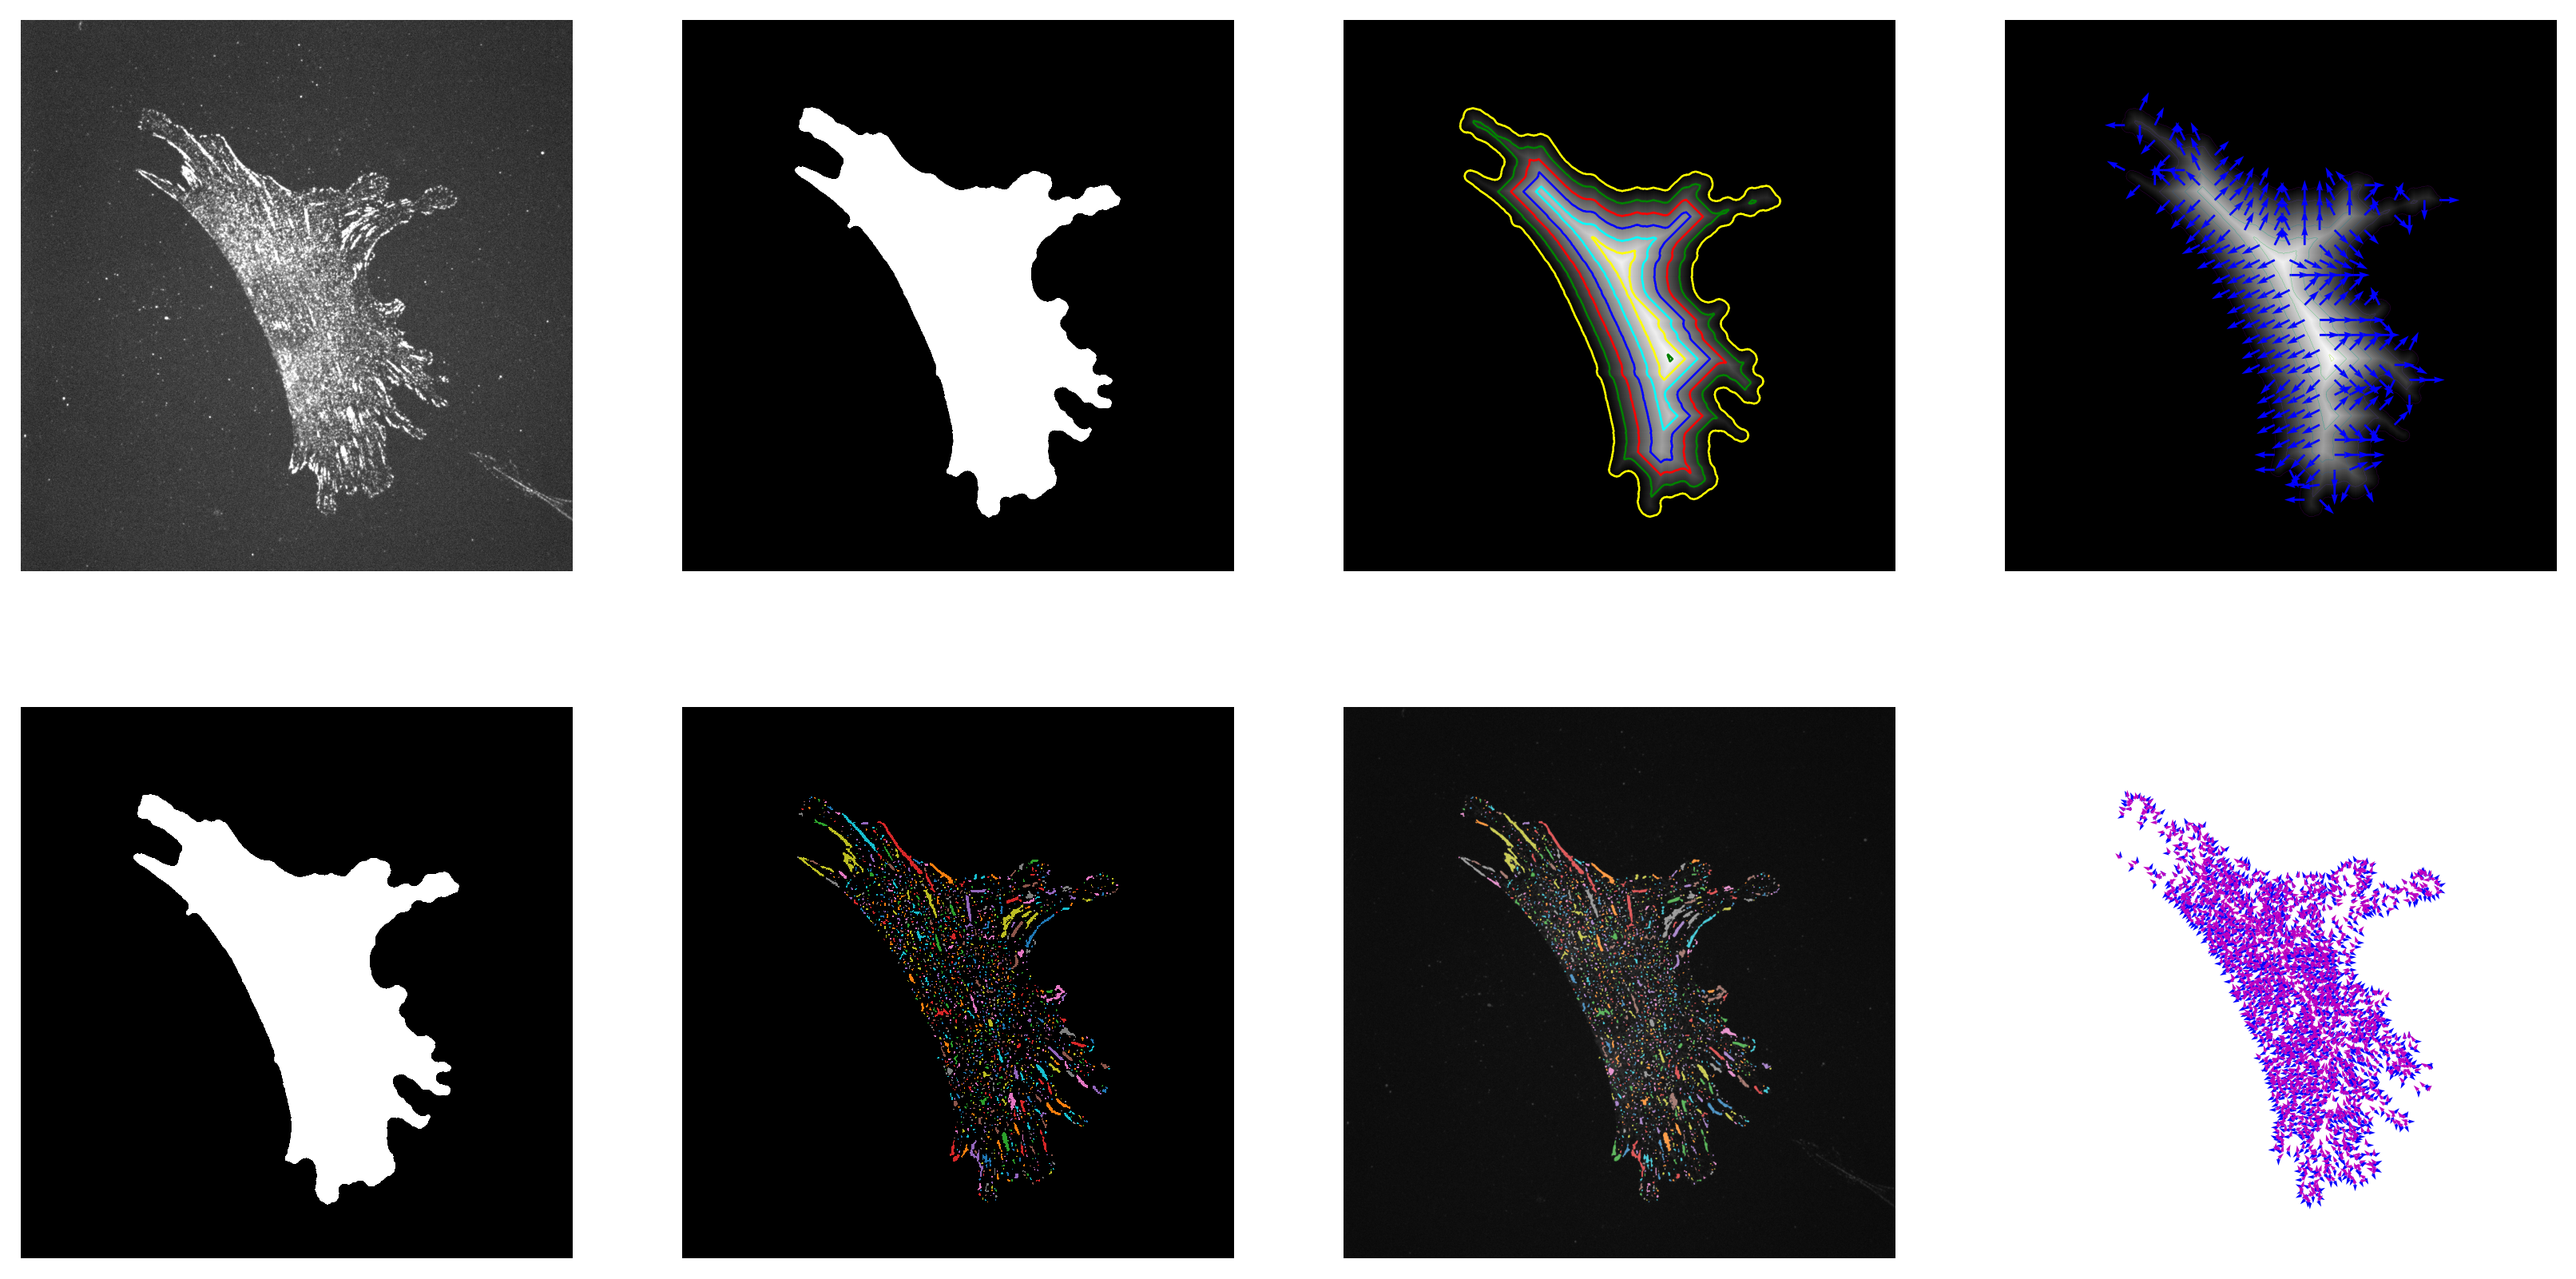

In [6]:
# for all tif files 
filenames = [x for x in os.listdir(image_2D_2CH_dir) if os.path.isfile(os.path.join(image_2D_2CH_dir, x)) and ('.tif' in x)]

# if not in run all mode, only test with the first image of the first movie
if not flag_run_all:
    filenames = filenames[56:57]

for filenameID in range(len(filenames)):
    
    filename = filenames[filenameID]

    number = int(filename[-7:-4])
    if number not in ctrl_one_cell_list:
        continue

    input_multich_img = tifffile.imread(os.path.join(image_2D_2CH_dir,filename))

    # Initialize the segmenter
    segmenter = FA_obj_segmenter()

    # Perform segmentation
    [major_FA_seg, new_cell_mask] = segmenter.apply_fa_obj_segmentation(input_multich_img)
   
    # Extract Object features
    FA_obj_feature_extractor = FA_obj_feature_extractor(filename = filename,  pax_seg = major_FA_seg, input_multich_img = input_multich_img,
                                                        new_cell_mask = new_cell_mask, filenameID = filenameID)

    [fa_obj_features, local_orientation] = FA_obj_feature_extractor.extract_features()
    
    # Plot figures for debug and presentation
    pax_image_label_overlay = display_fa_segmentation_panels(input_image = (input_multich_img[1,:,:]), input_cell_mask = new_cell_mask, input_obj_seg = major_FA_seg, local_orientation = local_orientation,
                                   plot_output_dir = plot_output_dir, filename = filename, flag_plot_save = flag_plot_save, flag_run_all = flag_run_all)


    tifffile.imsave(os.path.join(os.path.join(seg_output_dir, 'label'), 'FA_obj_label_'+filename+'.tif'), major_FA_seg.astype(np.uint16))       
    tifffile.imsave(os.path.join(os.path.join(seg_output_dir, 'mask'), 'cell_mask_'+filename+'.tif'),new_cell_mask.astype(np.uint8))   
    tifffile.imsave(os.path.join(os.path.join(seg_output_dir, 'rgb'), 'pax_segrgb_'+filename+'.jpg'),pax_image_label_overlay)                     

                